# **Price Sale Study**

## Objectives

* Clean Data

## Inputs

* outputs/datasets/filled/HousingPricesDataFilled.csv

## Outputs

* outputs/datasets/cleaned/TrainSet.csv
* outputs/datasets/cleaned/TestSet.csv

## Additional Comments

We have already dealt with the missing data in the PriceSaleStudy.


---

# Change working directory


* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heriting-housing-issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heriting-housing-issues'

---

# Load Data

In [4]:
import pandas as pd
df1 = (pd.read_csv("/workspace/heriting-housing-issues/outputs/datasets/filled/HousePriceRecordFilled.csv"))
df1.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,0.0,460,RFn,...,80.0,0.0,0,8,6,1262,0.0,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,0.0,2001,2002,223500
3,961,0.0,3.0,No,216,ALQ,540,0.0,642,Unf,...,60.0,0.0,35,5,7,756,0.0,1915,1970,140000
4,1145,0.0,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,0.0,2000,2000,250000


# Correlation and PPS Analysis

---

The below codes for Correlation and PPS have been taken from Code Institude walkthrough project. There aim is to calculate and show in a heatmap the correlation and PPS between all variables (feature + target).

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [6]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df1)

/tmp/ipykernel_2826/110975372.py:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_spearman = df.corr(method="spearman")
/tmp/ipykernel_2826/110975372.py:37: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_pearson = df.corr(method="pearson")


PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  552.0  0.051  0.099  0.0  0.0  0.0  0.057  0.625




* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



/tmp/ipykernel_2826/110975372.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


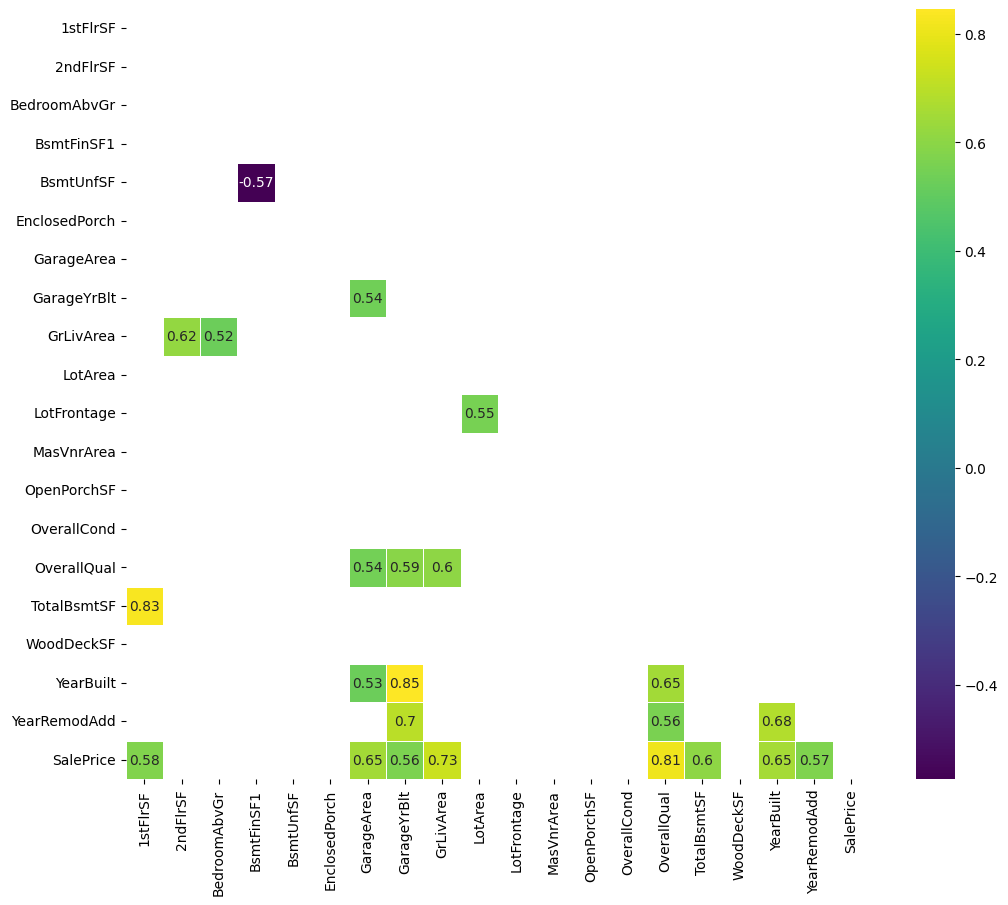



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



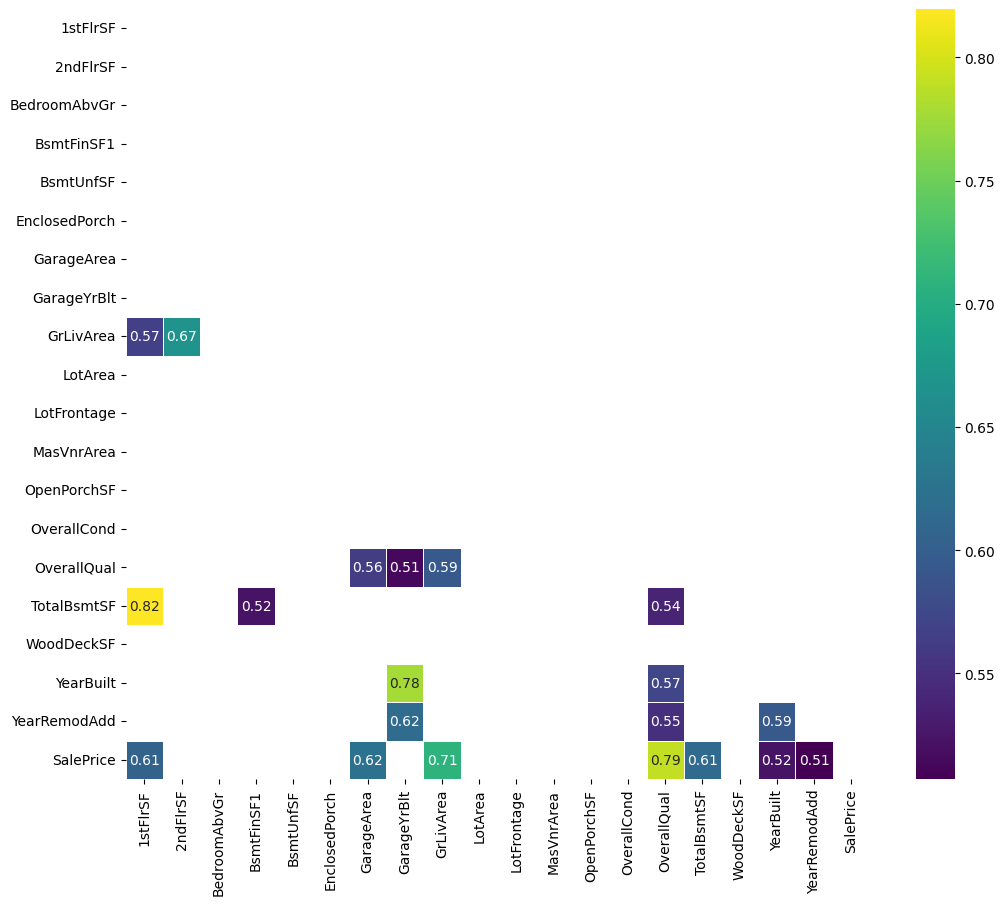



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



/tmp/ipykernel_2826/110975372.py:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


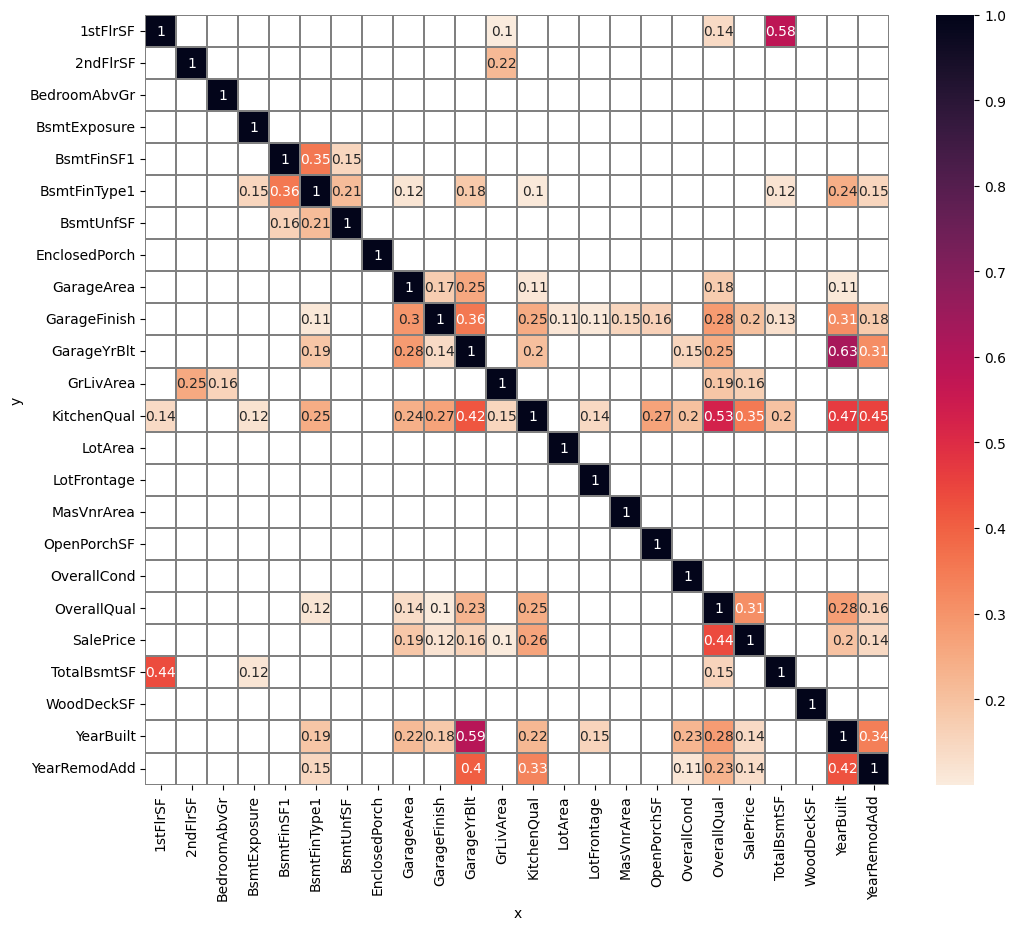

In [7]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.5, PPS_Threshold =0.1,
                  figsize=(12,10), font_annot=10)

---

## Assessing Missing Data Levels

As mention in the introduction of this notebook, we have already dealt with the missing data in the pass notebook (PriceSaleStudy). The below is just to confirm we have no missing data.

In [8]:
def EvaluateMissingData(df):
    missing_data_absolute = df.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
                            data={"RowsWithMissingData": missing_data_absolute,
                                   "PercentageOfDataset": missing_data_percentage,
                                   "DataType": df.dtypes}
                                    )
                          .sort_values(by=['PercentageOfDataset'], ascending=False)
                          .query("PercentageOfDataset > 0")
                          )

    return df_missing_data

In [9]:
EvaluateMissingData(df1)

,RowsWithMissingData,PercentageOfDataset,DataType


---

## Split Train and Test set

In [10]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df1,
                                        df1['SalePrice'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (1168, 24) 
TestSet shape: (292, 24)


In [11]:
df_missing_data = EvaluateMissingData(TrainSet)
print(f"* There are {df_missing_data.shape[0]} variables with missing data \n")
df_missing_data

* There are 0 variables with missing data 



,RowsWithMissingData,PercentageOfDataset,DataType


---

## Drop variables

As mention in PriceSaleStudy page, we suggested to drop the value WoodDeckSF since 89% of the data is missing. We decided to wait to confirm the data doesn't have high correlation with the target or another Feature. In the above heatmap, we can confirm that WoodDeckSF has very weak correlation with the target and other feature and has a low PPS score. For this reason we are droping this feature.

In [12]:
from feature_engine.selection import DropFeatures
imputer = DropFeatures(features_to_drop='WoodDeckSF')
imputer.fit(TrainSet)
df_method = imputer.transform(TrainSet)
df_method.count()

1stFlrSF         1168
2ndFlrSF         1168
BedroomAbvGr     1168
BsmtExposure     1168
BsmtFinSF1       1168
BsmtFinType1     1168
BsmtUnfSF        1168
EnclosedPorch    1168
GarageArea       1168
GarageFinish     1168
GarageYrBlt      1168
GrLivArea        1168
KitchenQual      1168
LotArea          1168
LotFrontage      1168
MasVnrArea       1168
OpenPorchSF      1168
OverallCond      1168
OverallQual      1168
TotalBsmtSF      1168
YearBuilt        1168
YearRemodAdd     1168
SalePrice        1168
dtype: int64

We can now see that in the testing df_method, the feature WoodDeckSF have been deleted, we now apply it on TrainSet and TestSet

In [13]:
from feature_engine.selection import DropFeatures
imputer = DropFeatures(features_to_drop='WoodDeckSF')
imputer.fit(TrainSet)

TrainSet, TestSet = imputer.transform(TrainSet) , imputer.transform(TestSet)

In [14]:
TrainSet.count()

1stFlrSF         1168
2ndFlrSF         1168
BedroomAbvGr     1168
BsmtExposure     1168
BsmtFinSF1       1168
BsmtFinType1     1168
BsmtUnfSF        1168
EnclosedPorch    1168
GarageArea       1168
GarageFinish     1168
GarageYrBlt      1168
GrLivArea        1168
KitchenQual      1168
LotArea          1168
LotFrontage      1168
MasVnrArea       1168
OpenPorchSF      1168
OverallCond      1168
OverallQual      1168
TotalBsmtSF      1168
YearBuilt        1168
YearRemodAdd     1168
SalePrice        1168
dtype: int64

# Push cleaned data to Repo

We are pushing the Database without missing data for the next step of Data Cleaning

In [15]:
TrainSet.to_csv(f"outputs/datasets/cleaned/TrainSetCleaned.csv",index=False)


In [16]:

TestSet.to_csv(f"outputs/datasets/cleaned/TestSetCleaned.csv",index=False)


**TrainSet and TestSet have been pushed in the folder outputs/datasets/cleaned/**